In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_us = pd.read_csv('us.csv', parse_dates=True, index_col='Date')
df_st = pd.read_csv('state.csv', parse_dates=True, index_col='Date')

In [2]:
print(df_us.sample(10))
print('\n' + '* ' * 45)
print(df_st.sample(10))

            Confirmed  Cumulated_Confirmed  Deaths  Cumulated_Deaths  \
Date                                                                   
2020-07-27      54806              4226910    1079            136917   
2020-07-14      61834              3374256     785            125413   
2020-07-10      67021              3131114     855            123151   
2020-04-23      31277               861551    1840             44038   
2020-04-28      24359              1005522    2204             52518   
2020-05-10      20687              1319047     945             73895   
2020-04-12      28057               553493    1493             21936   
2020-07-05      42953              2846350     212            119464   
2020-03-26      17050                81966     253              1159   
2020-07-21      63496              3834073    1039            130966   

            Recovered  Cumulated_Recovered  
Date                                        
2020-07-27      46474              2136603  


In [3]:
print(df_us.info())
print('\n' + '* ' * 45)
print(df_st.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 186 entries, 2020-01-21 to 2020-08-17
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Confirmed            186 non-null    int64
 1   Cumulated_Confirmed  186 non-null    int64
 2   Deaths               186 non-null    int64
 3   Cumulated_Deaths     186 non-null    int64
 4   Recovered            186 non-null    int64
 5   Cumulated_Recovered  186 non-null    int64
dtypes: int64(6)
memory usage: 10.2 KB
None

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 186 entries, 2020-01-21 to 2020-08-17
Data columns (total 55 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   AK      186 non-null    int64
 1   AZ      186 non-null    int64
 2   CA      186 non-null    int64
 3   CO      186 non-null    int64
 4   HI      186 non-nu

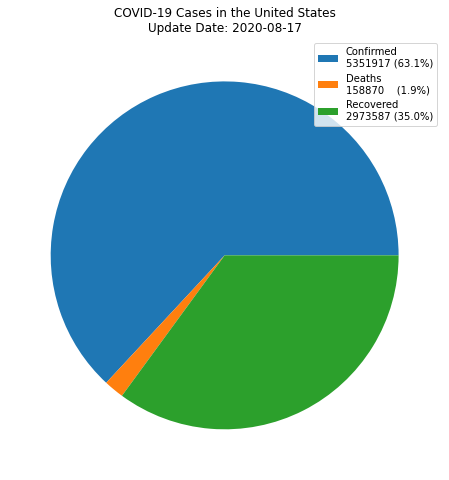

In [4]:
update_date = '2020-08-17'
n_cases = [df_us.loc[update_date, 'Cumulated_Confirmed'],
           df_us.loc[update_date, 'Cumulated_Deaths'],
           df_us.loc[update_date, 'Cumulated_Recovered']]

labels = ['Confirmed\n{} ({:.1f}%)'.format(n_cases[0],  100 * n_cases[0]/sum(n_cases)), 
          'Deaths\n{}    ({:.1f}%)'.format(n_cases[1],  100 * n_cases[1]/sum(n_cases)), 
          'Recovered\n{} ({:.1f}%)'.format(n_cases[2],  100 * n_cases[2]/sum(n_cases))]

title = 'COVID-19 Cases in the United States\nUpdate Date: {}'.format(update_date)

plt.pie(n_cases)
plt.gcf().set_size_inches(8,8)
plt.legend(labels)
plt.title(title)
plt.show()

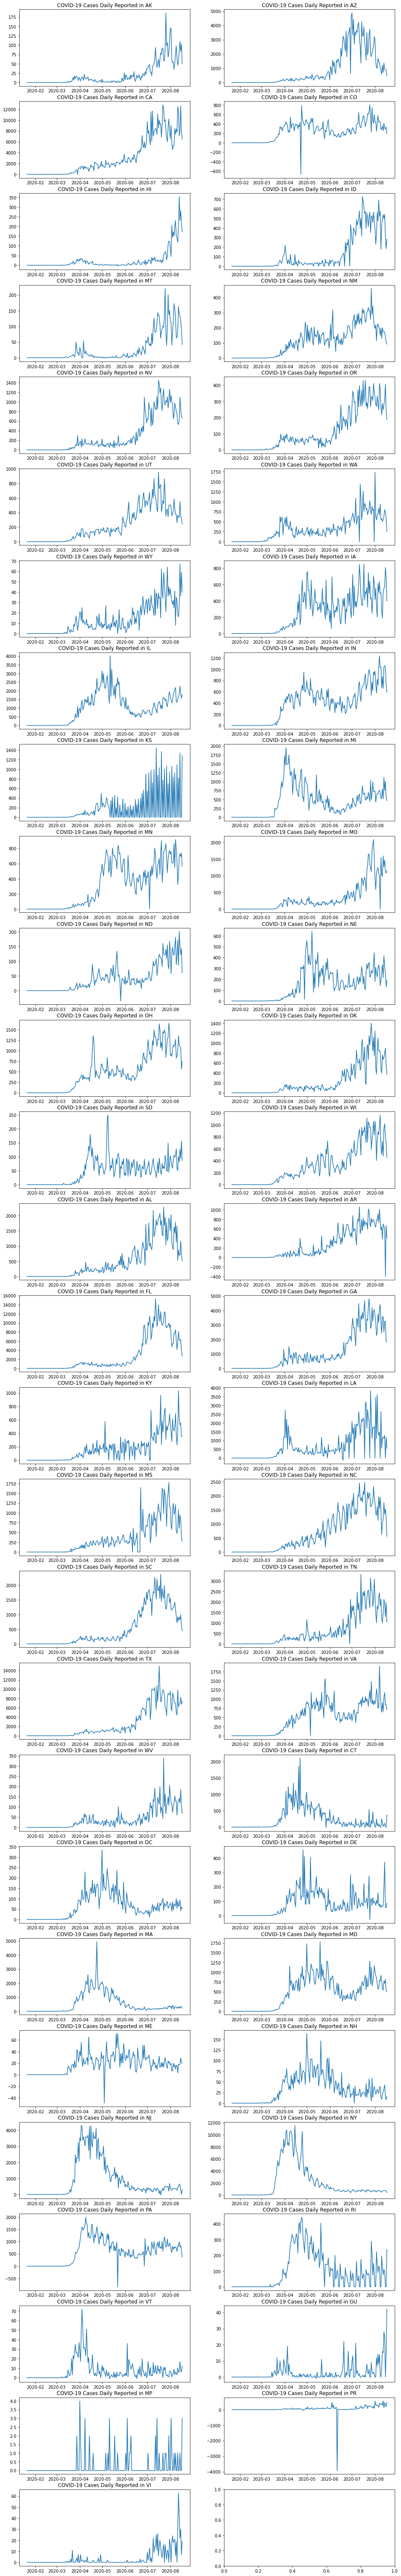

In [5]:
fig, axes = plt.subplots(28, 2, figsize=(16,112))
states = df_st.columns.to_list()
plt.gcf().autofmt_xdate
for k in range(len(states)):
    ax, state =axes[k // 2][k % 2], states[k]
    ax.plot(df_st[state])
    ax.set_title('COVID-19 Cases Daily Reported in {}'.format(state))
plt.show()

